## Gini Index vs. GDP (by Country)
The propsed hypothesis for this notebook is: "Income inequality increases with the increase of a Nations Gross Domestic Product". 
To test this hypothesis the following notebook will look to explore the relation between these two common performance metrics of a range of countries.

The Gini coefficient or index is a measure of the statistical dispersion representing the income inequality or wealth inequality of a country. A value of 0 represents prefect equality where everyone has the same income, while a value of 1 represents maximum inequality.

## Import libraries and prepare the general dataset
Import the appropriate libraries that will be used for analysis throughout the notebook. Additionally, prepare the dataset for analysis.

The GDP dataset was acquired from the OECD Statistics data website and comprises the GDP of the OECD member nations over the period 2000 to 2019. The GINI Index Dataset was acquired from the OECD Statistics data website and comprises the GINI Index of the OECD member nations over the period 2000 to 2019. This dataset does not contain values for every country for every year as this value is not reported for each year.

In [23]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Load current .csv dataset for GDP data
gdpData = "datasets/GDP_Selected_2000_2020_OECD.csv"

# columns = {'Country','Metric', 'Subject','Measure', 'Frequency','Year', 'Value', 'Flag'}
rawGdp_df = pd.read_csv(gdpData)

rawGdp_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,GDP,TOT,USD_CAP,A,2000,28252.629885,NaN
1,AUS,GDP,TOT,USD_CAP,A,2001,29493.214856,NaN
2,AUS,GDP,TOT,USD_CAP,A,2002,30740.962903,NaN
3,AUS,GDP,TOT,USD_CAP,A,2003,32248.255835,NaN
4,AUS,GDP,TOT,USD_CAP,A,2004,33865.906508,NaN


## Keep only most relevant entry for each country
Since the dataset encompases reported GDP data from each country over the period of 2016 to present, some countries will report these values at different intervals than others. This will result in multiple entries for many nations, but only single entries for other. All of which are distributed over several years. Here the data is processed to only retain the most recent reported entry for each country (removing the previous entries), so that only one entry per country remains.

In [24]:
# Sort the GDP data by Year.
gdp_df = rawGdp_df.copy().sort_values(by='TIME', ascending=False)
gdp_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
1227,EU27_2020,GDP,TOT,USD_CAP,A,2020,41235.245877,NaN
391,NLD,GDP,TOT,USD_CAP,A,2020,57482.115092,P
40,AUT,GDP,TOT,USD_CAP,A,2020,55407.641086,NaN
537,SWE,GDP,TOT,USD_CAP,A,2020,53719.497913,NaN
696,EST,GDP,TOT,USD_CAP,A,2020,38359.249172,NaN


In [25]:
# From the sorted data, drop the reported values for each country except the most recent report.
gdp_df = gdp_df.drop_duplicates(subset=['LOCATION'], keep='first')
gdp_df = gdp_df.drop(columns=['Flag Codes','SUBJECT','FREQUENCY','INDICATOR', 'MEASURE'])
gdp_df.rename(columns={'Value':'GDP'}, inplace=True)
gdp_df

,LOCATION,TIME,GDP
1227,EU27_2020,2020,41235.245877
391,NLD,2020,57482.115092
40,AUT,2020,55407.641086
537,SWE,2020,53719.497913
696,EST,2020,38359.249172
...,...,...,...
727,IDN,2017,11050.882373
806,ZAF,2017,12810.965544
655,CHN,2017,14306.396116
709,IND,2016,5901.210840


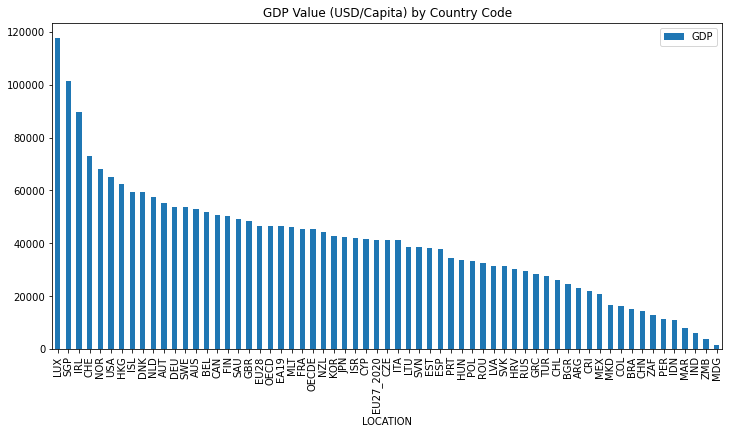

In [26]:
# Plot the GDP data for each country code.
gdp_df = gdp_df.sort_values(by='GDP', ascending=False)
gdp_df[['LOCATION','GDP']].plot(kind='bar', x='LOCATION', figsize=(12,6), title='GDP Value (USD/Capita) by Country Code')
plt.show()

## Read in the Gini Index

In [27]:
# Load current .csv dataset for Gini data
giniData = "datasets/Gini Index.csv"

# columns = {'Country','Metric', 'Subject','Measure', 'Frequency','Year', 'Value', 'Flag'}
rawGini_df = pd.read_csv(giniData)

rawGini_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,INCOMEINEQ,GINI,INEQ,A,2012,0.326,NaN
1,AUS,INCOMEINEQ,GINI,INEQ,A,2014,0.337,NaN
2,AUS,INCOMEINEQ,GINI,INEQ,A,2016,0.330,NaN
3,AUS,INCOMEINEQ,GINI,INEQ,A,2018,0.325,NaN
4,AUT,INCOMEINEQ,GINI,INEQ,A,2007,0.284,NaN


## Keep only most relevant entry for each country
Since the dataset encompases reported Gini Index from each country over the period of 1976 to present, some countries will report these values at different intervals than others. This will result in multiple entries for many nations, but only single entries for other. All of which are distributed over several years. Here the data is processed to only retain the most recent reported entry for each country (removing the previous entries), so that only one entry per country remains.

In [28]:
# Sort the Gini Index by Year.
gini_df = rawGini_df.copy().sort_values(by='TIME', ascending=False)
gini_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
410,CRI,INCOMEINEQ,GINI,INEQ,A,2019,0.478,NaN
443,ROU,INCOMEINEQ,GINI,INEQ,A,2018,0.350,NaN
294,SWE,INCOMEINEQ,GINI,INEQ,A,2018,0.275,NaN
352,ISR,INCOMEINEQ,GINI,INEQ,A,2018,0.348,NaN
59,CAN,INCOMEINEQ,GINI,INEQ,A,2018,0.303,NaN


In [29]:
# From the sorted data, drop the reported values for each country except the most recent report.
gini_df = gini_df.drop_duplicates(subset=['LOCATION'], keep='first')
gini_df = gini_df.drop(columns=['INDICATOR','Flag Codes','SUBJECT','MEASURE','FREQUENCY'])
gini_df.rename(columns={'Value':'GINI'}, inplace=True)
gini_df

,LOCATION,TIME,GINI
410,CRI,2019,0.478
443,ROU,2018,0.350
294,SWE,2018,0.275
352,ISR,2018,0.348
59,CAN,2018,0.303
232,NOR,2018,0.262
120,FRA,2018,0.301
246,POL,2018,0.281
430,BGR,2018,0.408
288,ESP,2018,0.330


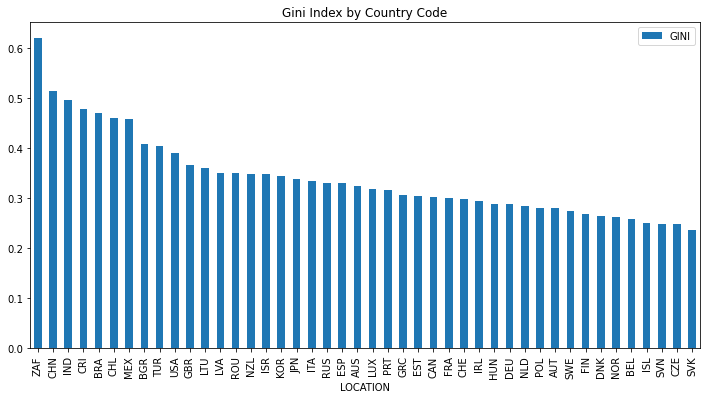

In [30]:
# Plot the Gini Index for each country code.
gini_df = gini_df.sort_values(by='GINI', ascending=False)
gini_df[['LOCATION','GINI']].plot(kind='bar', x='LOCATION', figsize=(12,6), title='Gini Index by Country Code')
plt.show()

## Get Country names from Country Code
Due to the format of the GDP data that was aqcuired the label of each country in the dataset was a 3 letter country code, rather than the country's name itself. To allow the data to be more human readable, the data would need appropriate labelling to identify the country by name. Through some additional processing these country codes could be matched with their corresponding country name.

In [31]:
# Fetch country code from website.
codes_df = pd.read_html('https://laendercode.net/en/3-letter-list.html')[0]
codes_df.head()
# Join the sorted data on the Country code, to get appropriate country name
merged_df = gini_df.merge(codes_df, left_on=['LOCATION'], right_on=['ISO 3166 ALPHA-3'])
merged_df.head()

,LOCATION,TIME,GINI,ISO 3166 ALPHA-3,Country
0,ZAF,2015,0.620,ZAF,South Africa
1,CHN,2011,0.514,CHN,China
2,IND,2011,0.495,IND,India
3,CRI,2019,0.478,CRI,Costa Rica
4,BRA,2013,0.470,BRA,Brazil


## Merging the Datasets
This set merges the GDP data set and the Gini Index dataset based on country code. One of the issues is some countries did not report the Gini Index in the last 3 years so some of the data years do not match correctly.

In [32]:
# Join the sorted data on the Country code, to get appropriate country name
merged_df = merged_df.merge(gdp_df, left_on=['LOCATION'], right_on=['LOCATION'])
merged_df

,LOCATION,TIME_x,GINI,ISO 3166 ALPHA-3,Country,TIME_y,GDP
0,ZAF,2015,0.620,ZAF,South Africa,2017,12810.965544
1,CHN,2011,0.514,CHN,China,2017,14306.396116
2,IND,2011,0.495,IND,India,2016,5901.210840
3,CRI,2019,0.478,CRI,Costa Rica,2019,21759.381303
4,BRA,2013,0.470,BRA,Brazil,2018,15272.368950
5,CHL,2017,0.460,CHL,Chile,2019,26128.403651
6,MEX,2016,0.458,MEX,Mexico,2019,20741.101487
7,BGR,2018,0.408,BGR,Bulgaria,2019,24579.331314
8,TUR,2015,0.404,TUR,Turkey,2019,27599.829476
9,USA,2017,0.390,USA,United States,2019,65240.379025


(0.0, 1.0)

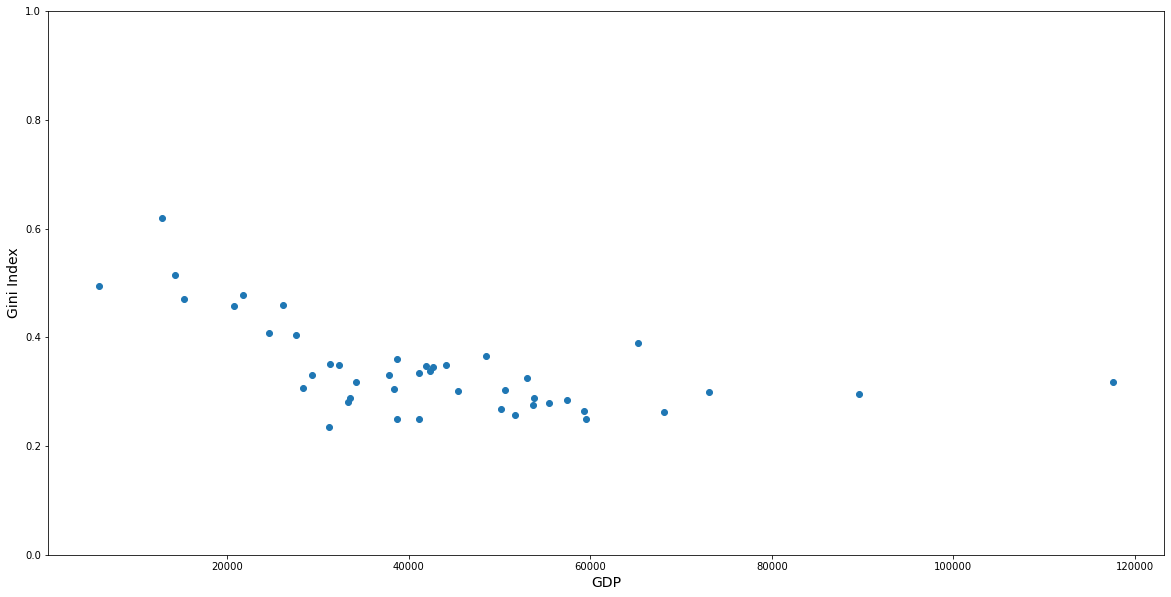

In [33]:
plt.figure(figsize=(20,10))
plt.scatter(merged_df['GDP'], merged_df['GINI'])
plt.xlabel('GDP', fontsize=14)
plt.ylabel("Gini Index",fontsize=14)
plt.ylim(ymin=0, ymax=1)

## GDP and Gini Index Correlation
From the plot comparison there is some visual evidence that a relation exists between the GDP of a nation and its measure of wealth inequailty. Further analysis would help clarify these initial impressions, which could be performed through the Pearson's Correlation coefficient. Due to the variability in the data, the Spearman Rank Correlation would also be performed.

In [34]:
# Pearson's Correlation Coefficient
pearson = merged_df['GINI'].corr(merged_df['GDP'])
spearman = merged_df['GINI'].corr(merged_df['GDP'], method='spearman')
print(f'Pearson\'s Correlation Coefficient between GDP Value and Cost of Living Index: {pearson}')
print(f'Spearman\'s Rank Correlation between GDP Value and Cost of Living Index: {spearman}')

Pearson's Correlation Coefficient between GDP Value and Cost of Living Index: -0.5720406830359092
Spearman's Rank Correlation between GDP Value and Cost of Living Index: -0.6006061048110858


## Interactive Plot
An interactive plot of GDP vs Gini Index that uses a slider for the year. 
Note: Countries do not report the GINI Index every year. Values between records has been interpolated. Countries do not appear on the graph until their first reported record.

In [35]:
# Load current .csv dataset for GDP data
gdpData2000 = "datasets/GDP_Selected_2000_2020_OECD.csv"

# columns = {'Country','Metric', 'Subject','Measure', 'Frequency','Year', 'Value', 'Flag'}
rawGdp_df = pd.read_csv(gdpData2000)
rawGdp_df = rawGdp_df.drop(columns=['Flag Codes','SUBJECT','FREQUENCY','INDICATOR', 'MEASURE'])
rawGdp_df.rename(columns={'Value':'GDP'}, inplace=True)

# columns = {'Country','Metric', 'Subject','Measure', 'Frequency','Year', 'Value', 'Flag'}
rawGini_df = pd.read_csv(giniData)
rawGini_df = rawGini_df.drop(columns=['INDICATOR','Flag Codes','SUBJECT','MEASURE','FREQUENCY'])
rawGini_df.rename(columns={'Value':'GINI'}, inplace=True)

plotdf = rawGini_df.merge(rawGdp_df, how='right', left_on=['LOCATION','TIME'], right_on=['LOCATION','TIME'])
plotdf.sort_values('TIME',inplace=True)

# Combine the two datasets
plotdf = rawGini_df.merge(rawGdp_df, how='right', left_on=['LOCATION','TIME'], right_on=['LOCATION','TIME'])
plotdf.sort_values('TIME',inplace=True)

# Fetch country code and names from website
# Join the sorted data on the Country code, to get appropriate country name
codes_df = pd.read_html('https://laendercode.net/en/3-letter-list.html')[0]
plotdf = plotdf.merge(codes_df, left_on=['LOCATION'], right_on=['ISO 3166 ALPHA-3'])

# Drop the redundent columns
plotdf = plotdf.drop(columns=['LOCATION', 'ISO 3166 ALPHA-3'])

# We can attempt to fill in the missing data using interpolate
plotdf['GINI'].interpolate()
print (plotdf.dtypes)
plotdf

TIME         int64
GINI       float64
GDP        float64
Country     object
dtype: object


,TIME,GINI,GDP,Country
0,2000,NaN,28252.629885,Australia
1,2001,NaN,29493.214856,Australia
2,2002,NaN,30740.962903,Australia
3,2003,NaN,32248.255835,Australia
4,2004,NaN,33865.906508,Australia
...,...,...,...,...
1121,2010,NaN,9586.999943,Peru
1122,2011,NaN,10289.261223,Peru
1123,2012,NaN,10545.510648,Peru
1124,2013,NaN,11039.698214,Peru


In [36]:
px.scatter(plotdf, x="GDP", y="GINI", animation_frame="TIME", 
           title="GINI Index vs GDP by Country from 2000 to 2019",
           hover_name="Country", color="Country",
           height=800, range_x=[0,120000], range_y=[0,0.8])